### Analysis of Extracted Features 


####  Plotting Word Clouds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from os import path
from PIL import Image

In [3]:
df= pd.read_csv('nlp_features.csv')
df.shape

(404290, 33)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            404290 non-null  int64  
 1   id                    404290 non-null  int64  
 2   qid1                  404290 non-null  int64  
 3   qid2                  404290 non-null  int64  
 4   question1             404290 non-null  object 
 5   question2             404290 non-null  object 
 6   is_duplicate          404290 non-null  int64  
 7   freq_qid1             404290 non-null  int64  
 8   freq_qid2             404290 non-null  int64  
 9   q1len                 404290 non-null  object 
 10  q2len                 404290 non-null  object 
 11  q1_n_words            404290 non-null  int64  
 12  q2_n_words            404290 non-null  int64  
 13  word_Common           404290 non-null  int64  
 14  word_Total            404290 non-null  float64
 15  

In [38]:
df=df.fillna(' ')
df.info()

print(df[df['question2'].isnull()])
df[df['question2'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            404290 non-null  int64  
 1   id                    404290 non-null  int64  
 2   qid1                  404290 non-null  int64  
 3   qid2                  404290 non-null  int64  
 4   question1             404290 non-null  object 
 5   question2             404290 non-null  object 
 6   is_duplicate          404290 non-null  int64  
 7   freq_qid1             404290 non-null  int64  
 8   freq_qid2             404290 non-null  int64  
 9   q1len                 404290 non-null  object 
 10  q2len                 404290 non-null  object 
 11  q1_n_words            404290 non-null  int64  
 12  q2_n_words            404290 non-null  int64  
 13  word_Common           404290 non-null  int64  
 14  word_Total            404290 non-null  float64
 15  

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio


In [23]:
df.drop([105780])

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66.0,...,0.857143,1.0,1.0,0.0,14.0,100,93,93,100,1.000000
1,1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51.0,...,1.000000,1.0,1.0,0.0,10.0,86,63,66,75,0.607843
2,2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73.0,...,1.000000,1.0,1.0,0.0,14.0,63,63,43,47,0.169492
3,3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50.0,...,0.909091,1.0,1.0,0.0,11.0,28,24,9,14,0.040000
4,4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76.0,...,1.000000,1.0,1.0,0.0,13.0,67,47,35,56,0.179487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,2,2,85.0,...,0.928571,1.0,1.0,0.0,14.0,97,88,91,87,0.392405
404286,404286,404286,18840,155606,do you believe there is life after death,is it true that there is life after death,1,12,1,41.0,...,1.000000,1.0,1.0,0.0,8.0,79,69,72,76,0.658537
404287,404287,404287,537928,537929,what is one coin,what is this coin,0,1,1,17.0,...,1.000000,1.0,1.0,0.0,4.0,86,79,79,76,0.470588
404288,404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,1,1,94.0,...,1.000000,1.0,1.0,0.0,17.0,37,35,30,34,0.053191


In [36]:
df_duplicate=df[df['is_duplicate']==1]
df_nonDuplicate=df[df['is_duplicate']==0]

p=np.stack([df_duplicate['question1'],df_duplicate['question2']]).flatten()
n=np.stack([df_nonDuplicate['question1'],df_nonDuplicate['question2']]).flatten()

print('Number of data points in class 1 : ',len(p))
print('Number of data points in class 0 : ',len(n))





Number of data points in class 1 :  298526
Number of data points in class 0 :  510054


In [39]:
with open('train_p.txt', "w", encoding="utf-8") as f:
    for i in p:
        f.write(f'{i}\n')
    f.close()

In [40]:
with open('train_n.txt', "w", encoding="utf-8") as f:
    for i in n:
        f.write(f'{i}\n')
    f.close()

In [44]:
d=path.dirname('.')
with open('train_n.txt', "r", encoding="utf-8") as f:
    textn_w=f.read()
    f.close()
with open('train_p.txt', "r", encoding="utf-8") as f:
    textp_w=f.read()
stopwords=set(STOPWORDS)
stopwords.add('said')
stopwords.add('br')
stopwords.add(' ')
stopwords.add('not')
stopwords.remove('no')
stopwords.remove('like')

print('Total Number of words in class 1',len(textp_w))
print('Total number of words in class 0',len(textn_w))

Total Number of words in class 1 16108711
Total number of words in class 0 33192722


Word Cloud for class 1


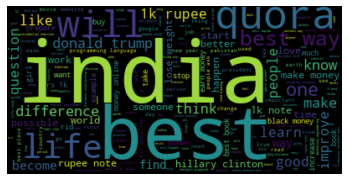

In [50]:
wc=WordCloud(background_color='black',max_words=len(textp_w),stopwords=stopwords)
wc.generate(textp_w)
print("Word Cloud for class 1")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for class 0


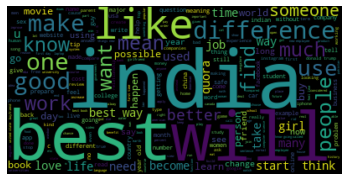

In [51]:
wc=WordCloud(background_color='black',max_words=len(textn_w),stopwords=stopwords)
wc.generate(textn_w)
print("Word Cloud for class 0")
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

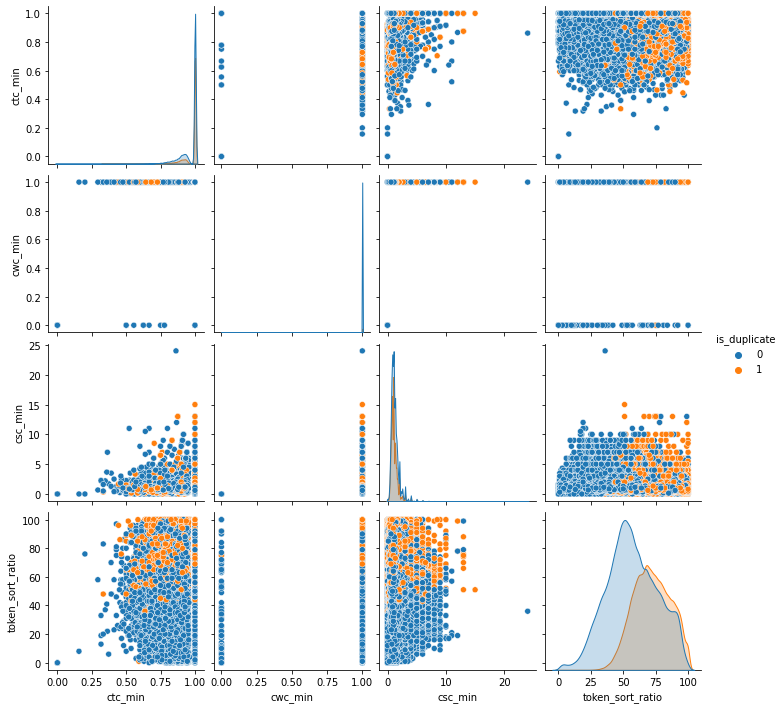

In [52]:
n=df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

without applying any model we can seperate class 0 points to some extent